In [1]:
import pandas as pd

filepath = "../Input/datosLimpios2022.csv"
data = pd.read_csv(filepath)

data.head()

,tip_movi,tip_naci,anio_movi,mes_movi,dia_movi,sex_migr,nac_migr,via_tran,mot_viam,cont_res,cont_nac,cont_prod,pais_prod,pais_res,pro_jefm,jef_migr,edad,precio_pasaje
0,Salida,Ecuatorianos,2022,4,20,Mujer,ECUADOR,Vía Aérea,Residencia,América,América,América,ARGENTINA,ARGENTINA,PICHINCHA,1,23,800.90
1,Entrada,Ecuatorianos,2022,5,26,Mujer,ECUADOR,Vía Aérea,Residencia,América,América,Europa,SUIZA SWITZERLAND,ECUADOR,PICHINCHA,1,68,1200.98
2,Salida,Ecuatorianos,2022,12,8,Hombre,ECUADOR,Vía Terrestre,Residencia,América,América,América,COLOMBIA,ECUADOR,CARCHI,11,14,800.90
3,Salida,Ecuatorianos,2022,10,3,Hombre,ECUADOR,Vía Aérea,Turismo,América,América,América,ESTADOS UNIDOS USA,ECUADOR,GUAYAS,12,71,800.90
4,Entrada,Ecuatorianos,2022,2,1,Mujer,ECUADOR,Vía Aérea,Residencia,Europa,América,Europa,ESPAÑA,ESPAÑA,PICHINCHA,1,38,1000.00


In [2]:
salidas_aereas_2022 = data[(data['tip_movi'] == 'Salida') & 
                           (data['anio_movi'] == 2022) & 
                           (data['via_tran'] == 'Vía Aérea')]
 
conteo_meses = salidas_aereas_2022['mes_movi'].value_counts().sort_index()
 
conteo_meses

mes_movi
1     236
2     325
3     374
4     417
5     449
6     330
7     408
8     460
9     486
10    470
11    516
12    386
Name: count, dtype: int64

In [3]:
vacaciones_escolares = salidas_aereas_2022[salidas_aereas_2022['mes_movi'].isin([2, 3, 4, 5])]
 
destinos_populares = vacaciones_escolares['pais_prod'].value_counts()
 
destino_mas_visitado = destinos_populares.idxmax(), destinos_populares.max()
 
destino_mas_visitado

('ESTADOS UNIDOS USA', 748)

In [4]:
turismo_america = data[(data['edad'] >= 18) & 
                       (data['mot_viam'] == 'Turismo') & 
                       (data['cont_prod'] == 'América') & 
                       (data['via_tran'] == 'Vía Aérea')]
 
promedio_pasajes = turismo_america['precio_pasaje'].mean()
 
promedio_pasajes

802.2419788664743

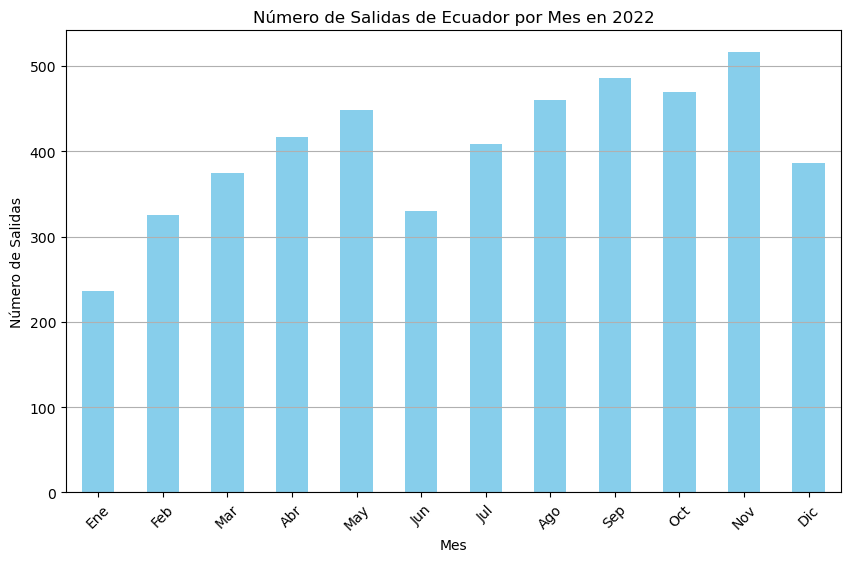

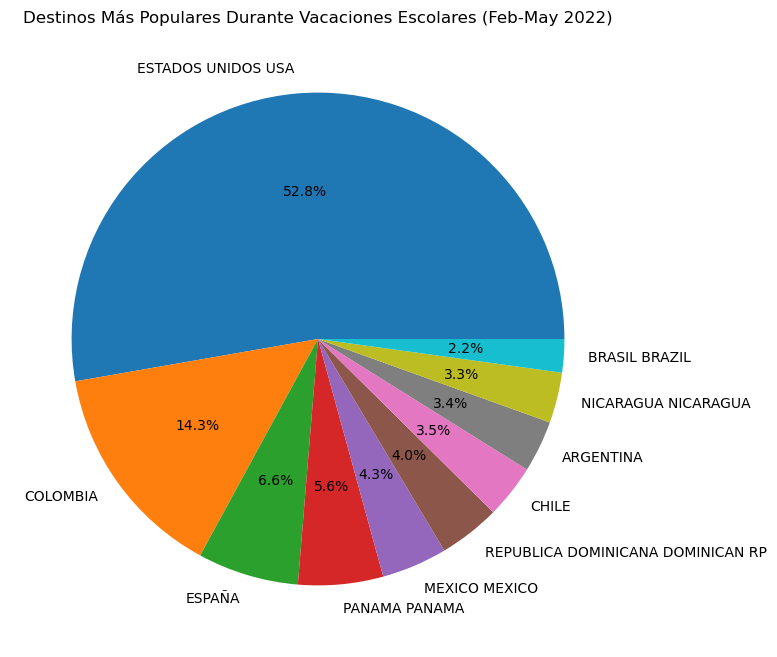

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
conteo_meses.plot(kind='bar', color='skyblue')
plt.title('Número de Salidas de Ecuador por Mes en 2022')
plt.xlabel('Mes')
plt.ylabel('Número de Salidas')
plt.xticks(range(12), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation=45)
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(8, 8))
destinos_populares.head(10).plot(kind='pie', autopct='%1.1f%%')
plt.title('Destinos Más Populares Durante Vacaciones Escolares (Feb-May 2022)')
plt.ylabel('')
plt.show()

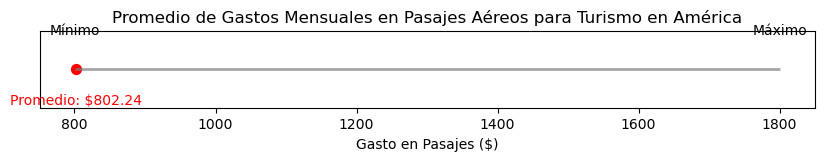

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que ya tienes los valores mínimos y máximos de gastos en tu data
min_gasto = turismo_america['precio_pasaje'].min()
max_gasto = turismo_america['precio_pasaje'].max()

# Generamos un rango de gastos para el eje X
gastos = np.linspace(min_gasto, max_gasto, 100)

# Ahora graficamos
plt.figure(figsize=(10, 1)) # Un gráfico alargado para mejor visualización de la línea horizontal
plt.hlines(y=1, xmin=min_gasto, xmax=max_gasto, color='grey', alpha=0.7, linewidth=2)
plt.scatter(promedio_pasajes, 1, color='red', s=50) # Punto que indica el promedio

# Añadimos anotaciones para el mínimo, máximo y promedio
plt.text(min_gasto, 1.05, 'Mínimo', ha='center')
plt.text(max_gasto, 1.05, 'Máximo', ha='center')
plt.text(promedio_pasajes, 0.95, f'Promedio: ${promedio_pasajes:.2f}', ha='center', color='red')

plt.title('Promedio de Gastos Mensuales en Pasajes Aéreos para Turismo en América')
plt.xlabel('Gasto en Pasajes ($)')
plt.yticks([]) # Ocultamos el eje Y porque no es relevante
plt.show()
